In [301]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [302]:
df=pd.read_excel("Toy2.xlsx")
df.tail()

,Day,Type,Feature1,Feature2,Feature3,Outcome
70,5,B,0.227860,0.275530,?,?
71,5,B,0.072226,0.740605,?,?
72,5,B,0.022544,0.750802,?,?
73,5,C,0.051146,0.040838,?,?
74,5,C,0.658285,0.465604,?,?


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       75 non-null     int64  
 1   Type      75 non-null     object 
 2   Feature1  75 non-null     float64
 3   Feature2  75 non-null     float64
 4   Feature3  75 non-null     object 
 5   Outcome   75 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.6+ KB


In [304]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,75.0,2.866667,1.368895,1.000000,2.000000,3.000000,4.000000,5.000000
Feature1,75.0,0.333402,0.220441,-0.094686,0.153485,0.348296,0.462211,0.797487
Feature2,75.0,0.397321,0.232725,-0.097380,0.210675,0.404492,0.570477,0.801860


# PREPROCESSING

In [305]:
train_df=df.iloc[:64,:]
test_df=df.iloc[64:,:]

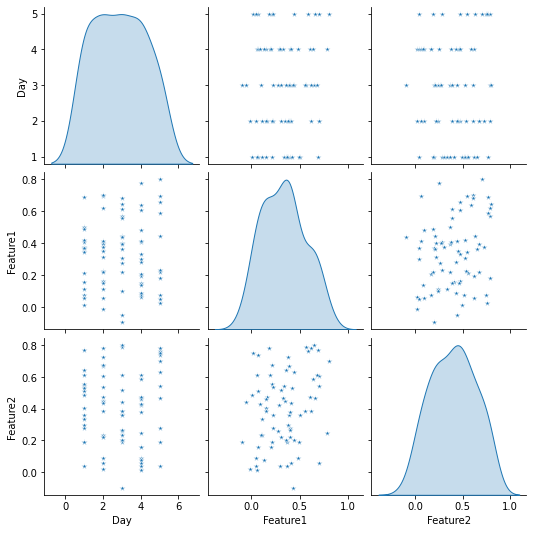

In [306]:
sns.pairplot(df,diag_kind="kde",markers="*");

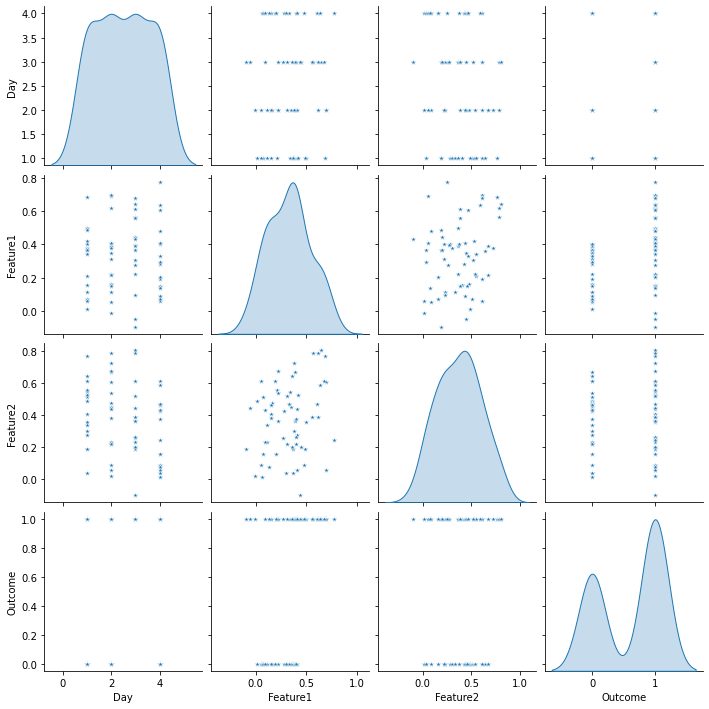

In [307]:
sns.pairplot(train_df,diag_kind="kde",markers="*");

In [308]:
data=train_df.copy()

In [309]:
data.head()

,Day,Type,Feature1,Feature2,Feature3,Outcome
0,1,C,0.403660,0.278940,P,0
1,1,A,0.073550,0.510298,P,0
2,1,B,0.375664,0.299433,P,0
3,1,A,0.058319,0.612322,P,0
4,1,B,0.114592,0.336539,P,0


In [310]:
label_encoder=LabelEncoder()
data["Type"]=label_encoder.fit_transform(data["Type"])
data["Feature3"]=label_encoder.fit_transform(data["Feature3"])
data["Outcome"]=label_encoder.fit_transform(data["Outcome"])
data

,Day,Type,Feature1,Feature2,Feature3,Outcome
0,1,2,0.403660,0.278940,0,0
1,1,0,0.073550,0.510298,0,0
2,1,1,0.375664,0.299433,0,0
3,1,0,0.058319,0.612322,0,0
4,1,1,0.114592,0.336539,0,0
...,...,...,...,...,...,...
59,4,0,0.604599,0.470533,2,1
60,4,0,0.409691,0.058819,0,1
61,4,2,0.134982,0.079770,1,1
62,4,2,0.639036,0.587389,0,1


In [311]:
X=data[["Day","Type","Feature1","Feature2","Feature3"]]
y=data[["Outcome"]]

In [312]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [313]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)
logistic_model

LogisticRegression()

In [314]:
y_pred=logistic_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5384615384615384

In [315]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.62      0.62      0.62         8

    accuracy                           0.54        13
   macro avg       0.51      0.51      0.51        13
weighted avg       0.54      0.54      0.54        13



# MODEL TUNING

# 1) Newton-cg L2

In [316]:
params1={"C":np.logspace(-3,3,7),
       "solver":["newton-cg","lbfgs","sag"],
       "penalty":["l2","None"]}

In [317]:
log_cv1=GridSearchCV(logistic_model,params1,cv=10)
log_cv1.fit(X_train,y_train)
print("Best Params for L2 and NONE: ",log_cv1.best_params_)
print("Best Score:",log_cv1.best_score_)

Best Params for L2 and NONE:  {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.7466666666666666


In [318]:
logistic_model1=LogisticRegression(C=0.001,penalty="l2",solver="newton-cg")
logistic_model1.fit(X_train,y_train)
logistic_model1

LogisticRegression(C=0.001, solver='newton-cg')

In [319]:
y_pred=logistic_model1.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score:  0.6153846153846154
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



# 2) Liblinear L2

In [320]:
params2={"C":np.logspace(-3,3,7),
       "solver":["liblinear"],
       "penalty":["l2","l1"]}

In [321]:
log_cv2=GridSearchCV(logistic_model,params2,cv=10)
log_cv2.fit(X_train,y_train)
print("Best Params for L2 and L1: ",log_cv2.best_params_)
print("Best Score:",log_cv2.best_score_)

Best Params for L2 and L1:  {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7466666666666666


In [322]:
logistic_model2=LogisticRegression(C=0.001,penalty="l2",solver="liblinear")
logistic_model2.fit(X_train,y_train)
logistic_model2

LogisticRegression(C=0.001, solver='liblinear')

In [323]:
y_pred=logistic_model2.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score:  0.6153846153846154
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



# 3) Saga L2

In [324]:
params3={"C":np.logspace(-3,3,7),
       "solver":["saga"],
       "penalty":["l2","l1","elasticnet","None"]}

In [325]:
log_cv3=GridSearchCV(logistic_model,params3,cv=10)
log_cv3.fit(X_train,y_train)
print("Best Params for L2 and L1: ",log_cv3.best_params_)
print("Best Score:",log_cv3.best_score_)

Best Params for L2 and L1:  {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.7466666666666666


In [326]:
logistic_model3=LogisticRegression(C=0.001,penalty="l2",solver="saga")
logistic_model3.fit(X_train,y_train)
logistic_model3

LogisticRegression(C=0.001, solver='saga')

In [327]:
y_pred=logistic_model3.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score:  0.6153846153846154
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13

